In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline 
df = pd.read_csv("session_csv2.csv") # reads the csv and creates the dataframe called movie
df.tail()
# len(df)

,id,action,value,created_at,user_id
8547,13369,enter,home,2018-05-18 14:28:23.604892+00,32
8548,13370,click_genetic_rec,17,2018-05-18 14:28:36.549576+00,32
8549,13371,enter_store,"17,สมใจ ลูกชิ้นทอด",2018-05-18 14:28:36.663858+00,32
8550,13372,enter,"โต้รุ่ง,สลัด checkout",2018-05-18 14:29:28.10125+00,32
8551,13373,enter_store,"17,สมใจ ลูกชิ้นทอด",2018-05-18 14:29:47.639756+00,32


In [3]:
df_recommended_menues = df[df['value']=="Q Learning"]

In [5]:
df_recommended_menues.head()

,id,action,value,created_at,user_id
4726,10332,click recommended menues,Q Learning,2018-04-24 11:09:50.539989+00,258
6825,11316,click recommended menues,Q Learning,2018-04-29 11:00:41.610772+00,97
6840,11331,click recommended menues,Q Learning,2018-04-29 11:02:15.312573+00,97
6846,11337,click recommended menues,Q Learning,2018-04-29 11:03:10.746726+00,97
7009,11500,click recommended menues,Q Learning,2018-04-29 14:07:01.884756+00,276


In [6]:
from datetime import datetime, timedelta

df_recommended_menues['created_at'] = pd.to_datetime(df_recommended_menues["created_at"])
df_recommended_menues['created_atc']=df_recommended_menues['created_at'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
df_time = pd.to_datetime(df_recommended_menues["created_atc"])
# df['created_atc']=df['created_at'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
date = df_time.value_counts().keys().tolist()
ourdates = pd.to_datetime(date, format='%d/%b/%Y:%H:%M:%S')
type(ourdates)
list_date = []
for i in ourdates:

    e =  i.strftime('%Y-%m-%d %H:%M:%S')
    list_date.append(e)
# print(type(e))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [7]:
df_time

4726   2018-04-24 18:09:50.539989+07:00
6825   2018-04-29 18:00:41.610772+07:00
6840   2018-04-29 18:02:15.312573+07:00
6846   2018-04-29 18:03:10.746726+07:00
7009   2018-04-29 21:07:01.884756+07:00
7097   2018-05-01 19:25:00.815085+07:00
7381   2018-05-05 18:26:43.352788+07:00
7396   2018-05-05 19:15:40.691564+07:00
7398   2018-05-05 19:15:43.773849+07:00
7403   2018-05-05 19:16:05.760198+07:00
7417   2018-05-05 19:44:24.028213+07:00
7419   2018-05-05 19:44:25.897016+07:00
7421   2018-05-05 19:44:27.018029+07:00
7427   2018-05-05 19:46:42.493245+07:00
7505   2018-05-06 18:33:53.854104+07:00
7508   2018-05-06 18:33:54.567767+07:00
7511   2018-05-06 18:34:17.114193+07:00
7592   2018-05-06 20:49:30.683125+07:00
7653   2018-05-06 21:04:31.813239+07:00
7823   2018-05-08 19:30:03.825505+07:00
7984   2018-05-09 20:13:09.554807+07:00
8113   2018-05-13 18:31:28.265251+07:00
8287   2018-05-15 19:05:58.691770+07:00
8289   2018-05-15 19:06:00.809809+07:00
8496   2018-05-18 20:02:31.093837+07:00


In [15]:
df_recommended_menues['dates'] = df_recommended_menues['created_atc'].dt.date

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
df_plot = df_recommended_menues['dates'].value_counts()

In [37]:
# # t = df_plot['day'].value_counts()
# from pylab import rcParams
# rcParams['figure.figsize'] = 25, 10


# ax= df_plot.plot.bar()

In [25]:
# df_plot.sort()
df_plot = df_recommended_menues.sort_values(by=['dates'])

In [28]:
# new_df = pd.DataFrame(columns = ['hour','minute','hourfloat','x','y'])
df_plot=pd.DataFrame(df_recommended_menues['dates'].value_counts())
df_plot.head()

,dates
2018-05-05,8
2018-05-18,6
2018-05-06,5
2018-04-29,4
2018-05-15,2


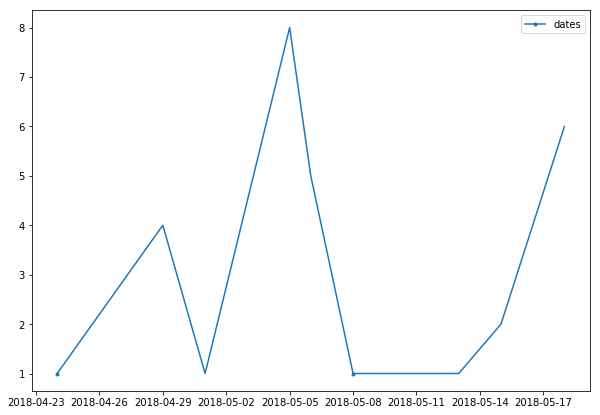

In [32]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
ax= df_plot.plot(style='.-', markevery=5,figsize = (10,7))
# # ax.set_xlabel("Areas",fontsize=12)
# ax.set_xticklabels(df_dayWeeks.index)

# ax.set_ylabel("Population",fontsize=12)
plt.show()

# Genetic

In [34]:
df_gene = df[df['action']=="click_genetic_rec"]

In [35]:
from datetime import datetime, timedelta

df_gene = df[df['action']=="click_genetic_rec"]
df_gene['created_at'] = pd.to_datetime(df_gene["created_at"])
df_gene['created_atc']=df_gene['created_at'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
# df_time = pd.to_datetime(df_recommended_menues["created_atc"])
# df['created_atc']=df['created_at'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
# date = df_time.value_counts().keys().tolist()
# ourdates = pd.to_datetime(date, format='%d/%b/%Y:%H:%M:%S')
# type(ourdates)
# list_date = []
# for i in ourdates:

#     e =  i.strftime('%Y-%m-%d %H:%M:%S')
#     list_date.append(e)
# # print(type(e))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [40]:

df_gene['dates'] = df_gene['created_atc'].dt.date
df_gene.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,action,value,created_at,user_id,created_atc,dates
4697,9971,click_genetic_rec,14,2018-04-22 11:23:20.312370,54,2018-04-22 18:23:20.312370+07:00,2018-04-22
4709,10068,click_genetic_rec,17,2018-04-22 13:38:33.050517,255,2018-04-22 20:38:33.050517+07:00,2018-04-22
5912,10465,click_genetic_rec,14,2018-04-24 12:47:18.584028,221,2018-04-24 19:47:18.584028+07:00,2018-04-24
6006,9901,click_genetic_rec,18,2018-04-21 15:55:53.365318,266,2018-04-21 22:55:53.365318+07:00,2018-04-21
6012,9958,click_genetic_rec,14,2018-04-22 11:11:37.412477,54,2018-04-22 18:11:37.412477+07:00,2018-04-22


In [328]:
df_plot_gene

,dates
2018-04-22,6
2018-04-21,4
2018-05-17,3
2018-04-24,3
2018-04-29,2
2018-05-05,2
2018-05-18,2
2018-05-04,2
2018-05-08,1
2018-05-09,1


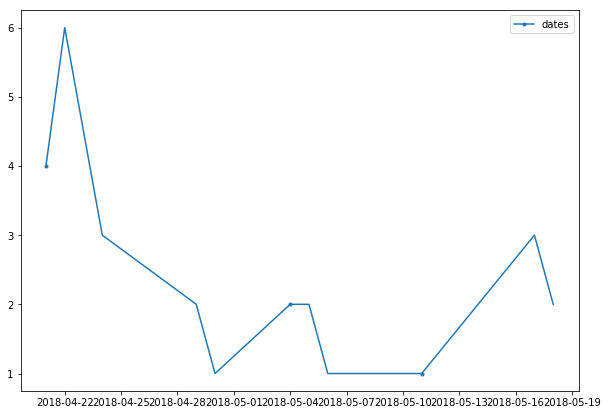

In [43]:
# df_plot_gene = df_gene['dates'].value_counts()
df_plot_gene=pd.DataFrame(df_gene['dates'].value_counts())
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
ax= df_plot_gene.plot(style='.-', markevery=5,figsize = (10,7))

In [44]:
# df_plot

,dates
2018-05-05,8
2018-05-18,6
2018-05-06,5
2018-04-29,4
2018-05-15,2
2018-04-24,1
2018-05-01,1
2018-05-08,1
2018-05-09,1
2018-05-13,1


In [290]:
from datetime import datetime, timedelta
#  and 
# df_ordered = df[(df['action']=="สั่งอาหาร") & (df['action']=="click recommended menues")]
df_ordered =  df[(df.action != 'enter') 
                 & (df.action != "enter_store") 
                 & (df.action != "เพิ่มเข้าตะกร้า") 
                 & (df.action != "search_cate") 
                 & (df.action != "search_input")
                 & (df.action != "กรอกประวัติความหิว")
                 & (df.action != "like")
                 & (df.action != "ใช้โค้ด")
                 & (df.action != "click_genetic_rec")]
                
#                 ]click_genetic_rec

# df_rec = df[df['value']=="Q Learning"]
# df_ordered[''] = df_rec
df_ordered['created_at'] = pd.to_datetime(df_ordered["created_at"])
df_ordered['created_atc']=df_ordered['created_at'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
df_ordered['dates'] = df_ordered['created_atc'].dt.date

df_ordered.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,id,action,value,created_at,user_id,created_atc,dates
3,1160,สั่งอาหาร,76,2018-02-21 10:15:29.734920,52,2018-02-21 17:15:29.734920+07:00,2018-02-21
7,414,สั่งอาหาร,47,2018-02-16 10:27:35.459889,18,2018-02-16 17:27:35.459889+07:00,2018-02-16
12,419,สั่งอาหาร,48,2018-02-16 10:34:29.828512,18,2018-02-16 17:34:29.828512+07:00,2018-02-16
69,555,สั่งอาหาร,57,2018-02-17 10:25:10.492441,17,2018-02-17 17:25:10.492441+07:00,2018-02-17
74,489,สั่งอาหาร,50,2018-02-16 15:46:14.582980,18,2018-02-16 22:46:14.582980+07:00,2018-02-16


In [291]:
df_ordered = df_ordered[(df_ordered['created_atc'] > '2018-05-01')]

In [292]:
# df_ordered[(df_ordered['dates'] == '2018-04-23')]
# df_ordered[df_ordered.dates == '2018-04-26']
# df_ordered.loc[df_ordered['dates'] == '2018-04-23']
# df_ordered1
# df_count_dates=pd.DataFrame(df_ordered['created_atc'].value_counts())

# df_count_dates = df_count_dates.sort_values(by=['created_atc'])
# df_count_dates.head()

In [293]:
# df_ordered_sort = df_ordered.sort_values(by=['created_atc'])
# df_ordered = df_ordered_sort[df_ordered_sort['action']=="สั่งอาหาร"]
# df_ordered


In [294]:

# df_ordered.head()

# df_ordered.head()
# 
# df_count_dates=pd.DataFrame(df_ordered['created_atc'].value_counts())
# df_count_dates.head()

# if tag in dict_store_tags:
#                             v = dict_store_tags[tag] 
#                             new_val = int(v)+counter
#                             dict_store_tags[tag] = new_val
#                         else:
#                             dict_store_tags[tag] = counter
new_df = pd.DataFrame(columns = ['user_id','ordered','click_rec_menues','dates'])
dict_ = {}
output = []
for k,i in df_ordered.iterrows():
        if i['action'] == "สั่งอาหาร":
            isOrder = 1
        else:
            isOrder = 0
        if i['value'] == "Q Learning":
            isClick = 1
        else:
            isClick = 0
        new_df.loc[len(new_df)] = [i['user_id'],isOrder,isClick,i['dates'],]

#     if any(new_df.dates == i['dates']) :
# #         if any(new_df.dates == i['dates']) :
#         index=new_df[new_df.dates == i['dates']].index.item()

#         if i['action'] == "สั่งอาหาร":
#             isOrder = 1
#         else:
#             isOrder = 0
#         if i['value'] == "Q Learning":
#             isClick = 1
#         else:
#             isClick = 0 
#         print("id",i['user_id'])
#         print("if",isClick)
#         new_df.set_value(index, 'ordered',isOrder)
#         new_df.set_value(index, 'click_rec_menues',isClick)

#         if new_df.iloc[index]['value_เครื่องดื่ม'] == 0  :
#             new_df.set_value(index, 'value_เครื่องดื่ม', i['value_เครื่องดื่ม'])
   


#     else :
#         if i['action'] == "สั่งอาหาร":
#             isOrder = 1
#         else:
#             isOrder = 0
#         if i['value'] == "Q Learning":
#             isClick = 1
#         else:
#             isClick = 0
#         new_df.loc[len(new_df)] = [i['user_id'],isOrder,isClick,i['dates'],]


In [295]:
# new_df.ordered
new_df
# df_temp = new_df[new_df.ordered == 1]
# df_temp
# df = df[df.line_race != 0]


,user_id,ordered,click_rec_menues,dates
0,271,1,0,2018-05-01
1,187,0,1,2018-05-01
2,187,1,0,2018-05-01
3,255,1,0,2018-05-01
4,279,1,0,2018-05-02
5,255,1,0,2018-05-02
6,97,1,0,2018-05-02
7,224,1,0,2018-05-02
8,223,1,0,2018-05-04
9,255,1,0,2018-05-04


In [296]:
# new_df.
# new_df.sort_values(by=['dates'])
# if tag in dict_store_tags:
#                             v = dict_store_tags[tag] 
#                             new_val = int(v)+counter
#                             dict_store_tags[tag] = new_val
#                         else:
#                             dict_store_tags[tag] = counter
# new_df = pd.DataFrame(columns = ['user_id','ordered','click_rec_menues','dates'])
# dict_ = {}
# output = []
# for k,i in new_df.iterrows():
# df_plot_gene=pd.DataFrame(df_gene['dates'].value_counts())
# new_df['ordered'].value_counts()
# new_df.
new_df_dummies = pd.get_dummies(new_df, columns=['ordered'])

# tempdf=pd.DataFrame(new_df_dummies.groupby('user_id')['ordered_1'].value_counts())
new_df_dummies.head()

,user_id,click_rec_menues,dates,ordered_0,ordered_1
0,271,0,2018-05-01,0,1
1,187,1,2018-05-01,1,0
2,187,0,2018-05-01,0,1
3,255,0,2018-05-01,0,1
4,279,0,2018-05-02,0,1


In [297]:
dict_or = {}
dict_click = {}
for k,i in new_df_dummies.iterrows():
    if i['ordered_1'] == 1:
        if i['user_id'] in dict_or:
            v = dict_or[i['user_id']] 
            new_val = int(v)+1
            dict_or[i['user_id']] = new_val
        else:
            dict_or[i['user_id']] = 1
            
    if i['click_rec_menues'] == 1:
        if i['user_id'] in dict_click:
            v = dict_click[i['user_id']] 
            new_val = int(v)+1
            dict_click[i['user_id']] = new_val
        else:
            dict_click[i['user_id']] = 1
dict_click        

{52: 4, 68: 3, 96: 3, 187: 1, 224: 1, 246: 2, 255: 6, 258: 3, 288: 1, 292: 1}

In [298]:
dict_click[52]

4

In [299]:
new_df2 = pd.DataFrame(columns = ['user_id','ordered','click_rec_menues',])

for k,i in dict_or.items():
    try:
        new_df2.loc[len(new_df2)] = [k,i,dict_click[k],]
    except:
        new_df2.loc[len(new_df2)] = [k,i,0]
    
#     print(k)

In [300]:
new_df2
output = []
for k,i in new_df2.iterrows():
    temp={"user_id":0,"percentage":0.0}
    temp['user_id']  = i['user_id']
    temp['percentage']  = (i['click_rec_menues']/i['ordered'])*100
    output.append(temp)

In [327]:
output

[{'percentage': 0.0, 'user_id': 271},
 {'percentage': 100.0, 'user_id': 187},
 {'percentage': 85.71428571428571, 'user_id': 255},
 {'percentage': 0.0, 'user_id': 279},
 {'percentage': 0.0, 'user_id': 97},
 {'percentage': 50.0, 'user_id': 224},
 {'percentage': 0.0, 'user_id': 223},
 {'percentage': 0.0, 'user_id': 46},
 {'percentage': 100.0, 'user_id': 96},
 {'percentage': 133.33333333333331, 'user_id': 52},
 {'percentage': 0.0, 'user_id': 89},
 {'percentage': 0.0, 'user_id': 90},
 {'percentage': 300.0, 'user_id': 68},
 {'percentage': 0.0, 'user_id': 287},
 {'percentage': 0.0, 'user_id': 286},
 {'percentage': 100.0, 'user_id': 246},
 {'percentage': 100.0, 'user_id': 288},
 {'percentage': 60.0, 'user_id': 258},
 {'percentage': 100.0, 'user_id': 292},
 {'percentage': 0.0, 'user_id': 54},
 {'percentage': 0.0, 'user_id': 295},
 {'percentage': 0.0, 'user_id': 237},
 {'percentage': 0.0, 'user_id': 211},
 {'percentage': 0.0, 'user_id': 142},
 {'percentage': 0.0, 'user_id': 236},
 {'percentage':

In [301]:
output
# newdf["page"].mean(axis=1) 
sum= 0
for o in output:
    sum+=o['percentage']
#     print(o['percentage'])
sum

1129.047619047619

In [302]:
sum/len(output)

40.32312925170068

In [307]:
df_graph = new_df_dummies[new_df_dummies['click_rec_menues']==1]
df_graph.head()

,user_id,click_rec_menues,dates,ordered_0,ordered_1
1,187,1,2018-05-01,1,0
11,224,1,2018-05-05,1,0
13,96,1,2018-05-05,1,0
14,96,1,2018-05-05,1,0
15,96,1,2018-05-05,1,0


In [308]:
df_a = df_graph.drop(['ordered_0','ordered_1','user_id'],1)

In [313]:
# pd.DataFrame(dict_click)

In [335]:
# df_graph.
df_a = pd.DataFrame(df_graph.groupby('dates')['click_rec_menues'].value_counts())

In [338]:
# df_a.drop(df_a.columns[[0]], axis=1)
df_a['click_rec_menues']

dates       click_rec_menues
2018-05-01  1                   1
2018-05-05  1                   8
2018-05-06  1                   5
2018-05-08  1                   1
2018-05-09  1                   1
2018-05-13  1                   1
2018-05-15  1                   2
2018-05-18  1                   6
Name: click_rec_menues, dtype: int64

In [324]:
df_plot = pd.DataFrame(columns = ['date','click_amount',])

# for k,i in dict_or.items():
#     try:
#         new_df2.loc[len(new_df2)] = [k,i,dict_click[k],]
#     except:
#         new_df2.loc[len(new_df2)] = [k,i,0]
    
for k,i in df_a.iterrows():
    df_plot.loc[len(df_plot)] = [k,i['click_rec_menues']]

In [325]:
df_plot

,date,click_amount
0,"(2018-05-01, 1)",1
1,"(2018-05-05, 1)",8
2,"(2018-05-06, 1)",5
3,"(2018-05-08, 1)",1
4,"(2018-05-09, 1)",1
5,"(2018-05-13, 1)",1
6,"(2018-05-15, 1)",2
7,"(2018-05-18, 1)",6


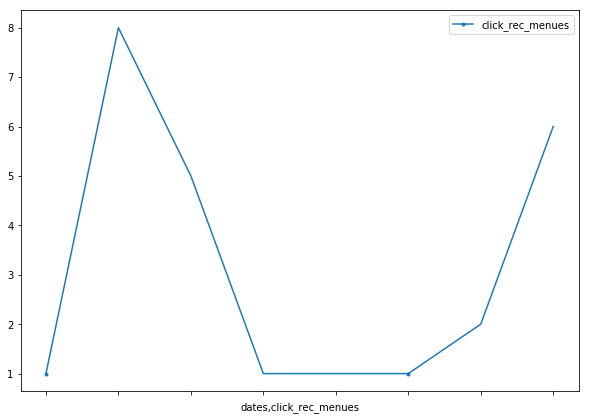

In [330]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
ax= df_a.plot(style='.-', markevery=5,figsize = (10,7))